**Analysis of IMDB Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, we need to read the titles file

In [3]:
df = pd.read_csv('title.basics.tsv.gz', delimiter="\t", compression='gzip', low_memory=False)

First 5 rows of our dataset

In [4]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Here we can see that in our dataframe there are following movie types:

In [8]:
df["titleType"].value_counts()

titleType
tvEpisode       8242050
short            994096
movie            680394
video            292022
tvSeries         262872
tvMovie          145537
tvMiniSeries      54155
tvSpecial         47519
videoGame         38254
tvShort           10308
tvPilot               1
Name: count, dtype: int64

The code generates pie charts to visualize the distribution of movie types within specific 30-year intervals. 
After preprocessing the dataset, it iterates over predefined intervals, filtering the data accordingly. 
Each interval's movie types are plotted in a pie chart, labeled with the respective time period. 
The legend displays movie types along with their counts. This analysis provides insights into how movie types have varied over time.

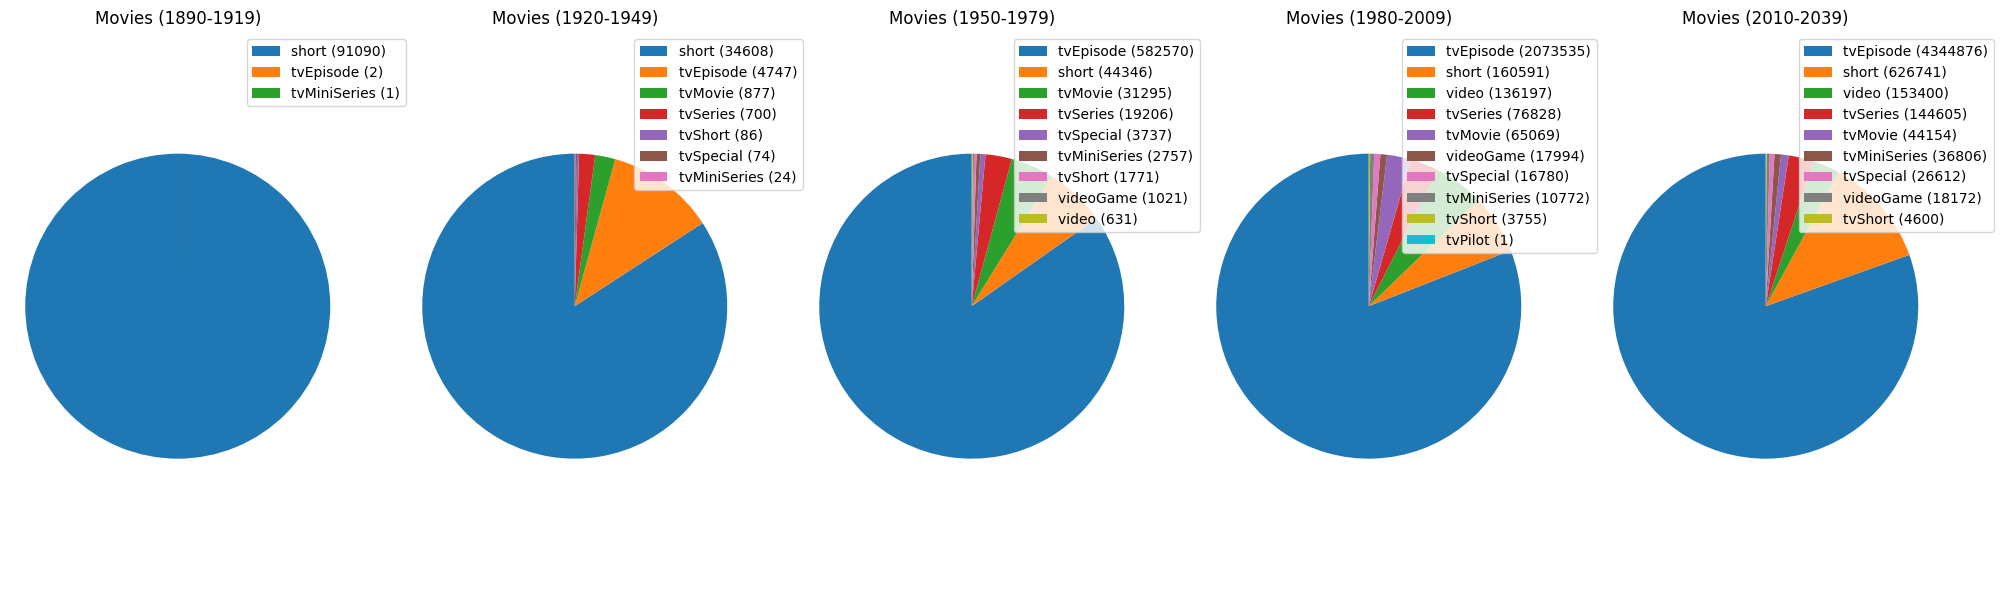

In [7]:
df['startYear'] = df['startYear'].replace('\\N', pd.NA)

df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

intervals = [(1890, 1919), (1920, 1949), (1950, 1979), (1980, 2009), (2010, 2039)]

fig, axs = plt.subplots(1, len(intervals), figsize=(20, 6))

for i, (start, end) in enumerate(intervals):
    movies_within_interval = df[(df['startYear'] >= start) & (df['startYear'] <= end) & (df['titleType'] != 'movie')]
    
    movie_type_counts = movies_within_interval['titleType'].value_counts()
    
    pie = axs[i].pie(movie_type_counts, startangle=90, colors=plt.cm.tab10.colors[:len(movie_type_counts)])
    axs[i].set_title(f'Movies ({start}-{end})')
    axs[i].axis('equal')

    labels = [f'{movie_type} ({count})' for movie_type, count in zip(movie_type_counts.index, movie_type_counts)]
    axs[i].legend(pie[0], labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

The data reveals an intriguing insight into the history of the film industry. In the 1890s, short movies were the most prevalent type, with approximately 91000 films produced during this period. However, as the industry evolved, the trend shifted. From 1920 to 1949, short movies remained the most popular genre. Yet, starting in the 1950s, TV episodes surpassed short films in terms of production volume. In the years between 1980 and the present day, the trend has not changed, with TV episodes reaching a staggering production rate of 4 million. Short movies, videos, and TV series were the next three most popular movie types, rounding out the top five.

In [ ]:
Subseting series

In [5]:
series = df[df['titleType'] == 'tvSeries']

In [ ]:
First 5 rows of series dataset

In [10]:
series.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34970,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943.0,1947,15,\N
35171,tt0035803,tvSeries,The German Weekly Review,Die Deutsche Wochenschau,0,1940.0,1945,\N,"Documentary,News"
37599,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946.0,1955,15,Talk-Show
38433,tt0039120,tvSeries,Americana,Americana,0,1947.0,1949,30,"Family,Game-Show"
38434,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947.0,1949,30,Family


Following code visualizes the distribution of TV series durations using Kernel Density Estimation (KDE). It converts the 'startYear' and 'endYear' columns to numeric types, drops rows with missing data, and calculates series durations. Then, it generates a KDE plot with duration values, providing insights into the distribution of TV series durations.

/tmp/ipykernel_160538/1738016791.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=series['duration'], color='skyblue', shade=True)


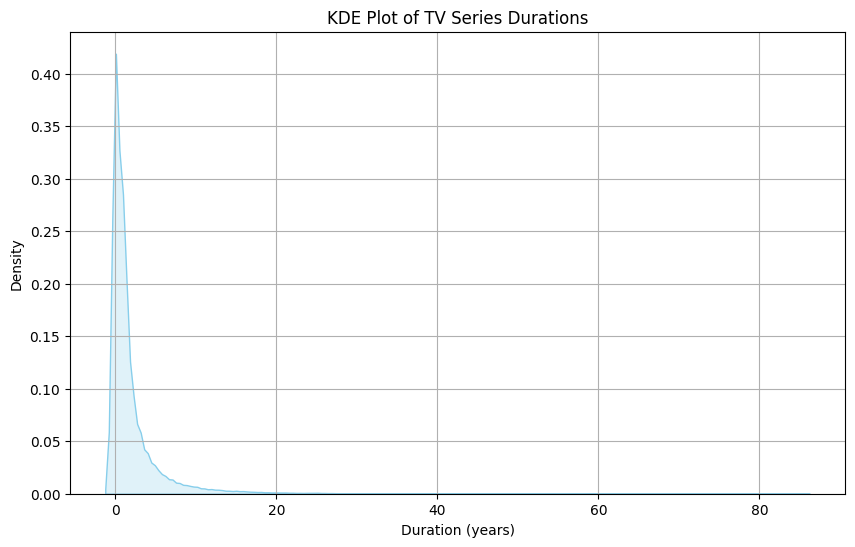

In [14]:
series['startYear'] = pd.to_numeric(series['startYear'], errors='coerce')
series['endYear'] = pd.to_numeric(series['endYear'], errors='coerce')

series = series.dropna(subset=['startYear', 'endYear'])

series['duration'] = series['endYear'] - series['startYear']

plt.figure(figsize=(10, 6))
sns.kdeplot(data=series['duration'], color='skyblue', shade=True)
plt.title('KDE Plot of TV Series Durations')
plt.xlabel('Duration (years)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

/tmp/ipykernel_160538/425314262.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=series['duration'], color='skyblue', shade=True)


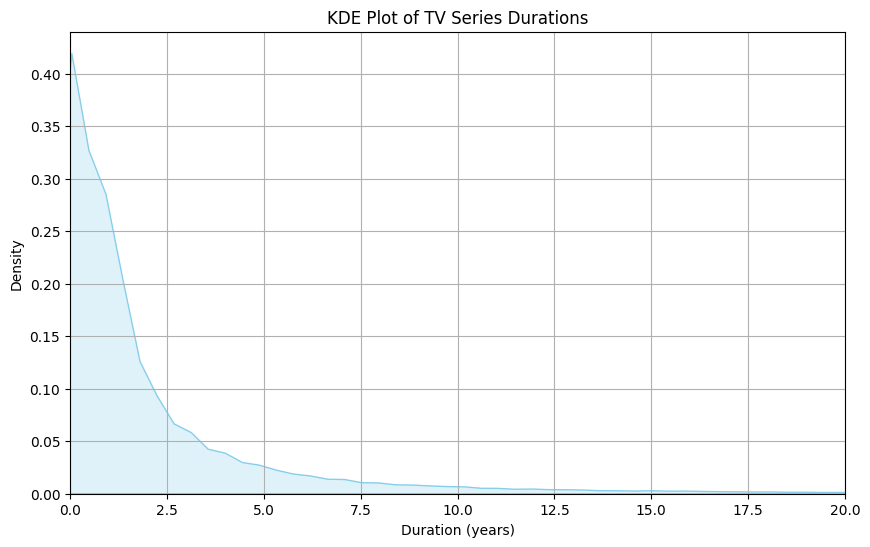

In [17]:
series['startYear'] = pd.to_numeric(series['startYear'], errors='coerce')
series['endYear'] = pd.to_numeric(series['endYear'], errors='coerce')

series = series.dropna(subset=['startYear', 'endYear'])

series['duration'] = series['endYear'] - series['startYear']

plt.figure(figsize=(10, 6))
sns.kdeplot(data=series['duration'], color='skyblue', shade=True)
plt.title('KDE Plot of TV Series Durations')
plt.xlabel('Duration (years)')
plt.ylabel('Density')
plt.xlim(0.00, 20)
plt.grid(True)
plt.show()

The zoom-in version, from 0-20 years.

This part shows which ganras are included in this dataset.

In [6]:
series["genres"].value_counts()

genres
Comedy                        11928
Drama                          9775
Documentary                    8115
\N                             5718
Talk-Show                      5492
                              ...  
Animation,Drama,Game-Show         1
Animation,Family,Romance          1
News,Short,Talk-Show              1
Documentary,Mystery,Sci-Fi        1
Adventure,Comedy,News             1
Name: count, Length: 1180, dtype: int64

This code segment analyzes TV series durations across top genres using a violin plot.It preprocesses the data, calculates series durations, and identifies the top 10 genres. Then, it filters the DataFrame to include only TV series of these genres. A violin plot is generated to visualize duration distributions for each genre. The plot is titled and labeled appropriately, with rotated genre labels for clarity. This visualization aids in understanding duration variations across top TV series genres.

/tmp/ipykernel_165646/749403112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['startYear'] = pd.to_numeric(series['startYear'], errors='coerce')
/tmp/ipykernel_165646/749403112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['endYear'] = pd.to_numeric(series['endYear'], errors='coerce')
/tmp/ipykernel_165646/749403112.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

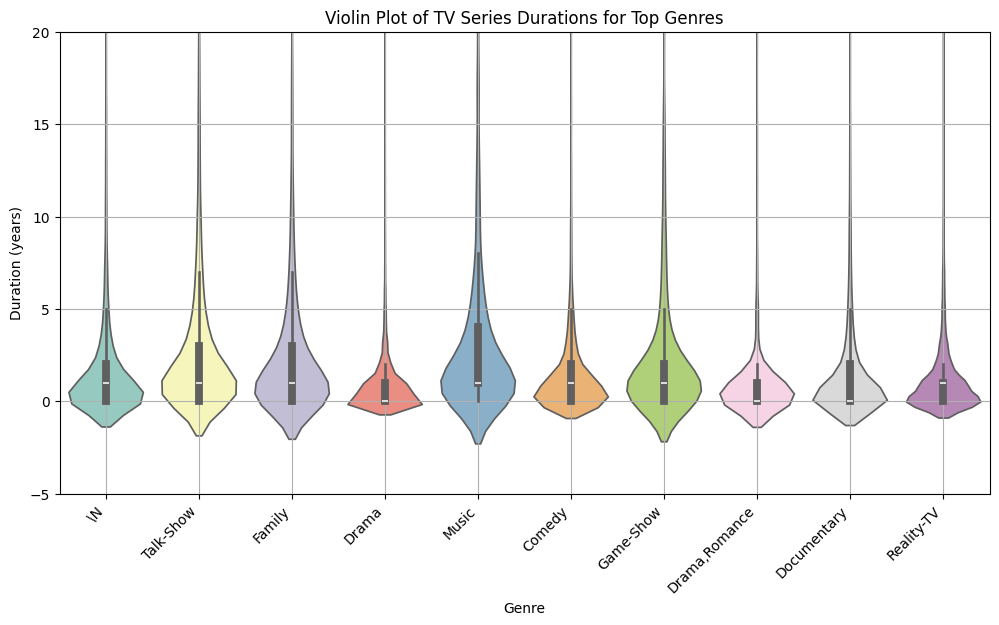

In [6]:
series['startYear'] = pd.to_numeric(series['startYear'], errors='coerce')
series['endYear'] = pd.to_numeric(series['endYear'], errors='coerce')

series = series.dropna(subset=['startYear', 'endYear'])

series['duration'] = series['endYear'] - series['startYear']

top_genres = series['genres'].value_counts().head(10).index

series_top_genres = series[series['genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='genres', y='duration', data=series_top_genres, palette='Set3')
plt.title('Violin Plot of TV Series Durations for Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (years)')
plt.xticks(rotation=45, ha='right')
plt.ylim(-5, 20) 
plt.grid(True)
plt.show()

In [13]:
series["isAdult"].value_counts()

isAdult
0    95045
1      450
Name: count, dtype: int64

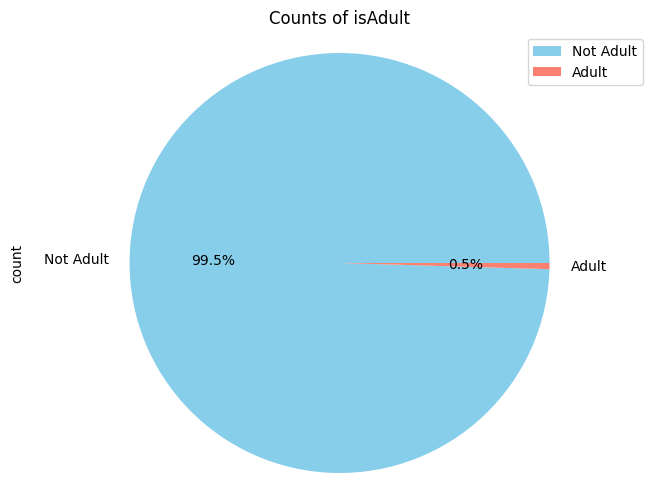

In [16]:
plt.figure(figsize=(8, 6))
series['isAdult'].value_counts().plot(kind='pie', colors=['skyblue', 'salmon'], labels=['Not Adult', 'Adult'], autopct='%1.1f%%')
plt.title('Counts of isAdult')
plt.axis('equal')
plt.legend()
plt.show()